In [114]:
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
import pickle

In [93]:
import streamlit as st
print(f'Streamlit: {st.__version__}')
import sklearn as sk
print(f'Sklearn: {sk.__version__}')


Streamlit: 1.41.1
Sklearn: 1.5.1


In [94]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,6,148,72,35,0,33.6,50,1
1,1,85,66,29,0,26.6,31,0
2,8,183,64,0,0,23.3,32,1
3,1,89,66,23,94,28.1,21,0
4,0,137,40,35,168,43.1,33,1


In [95]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [96]:
X = df.copy()
X.drop("Outcome", axis=1, inplace=True)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
0,6,148,72,35,0,33.6,50
1,1,85,66,29,0,26.6,31
2,8,183,64,0,0,23.3,32
3,1,89,66,23,94,28.1,21
4,0,137,40,35,168,43.1,33


In [97]:
# Define target set
y = df["Outcome"]

In [98]:
# Split into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [99]:
X_test.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
533,6,91,0,0,0,29.8,31
62,5,44,62,0,0,25.0,36
421,2,94,68,18,76,26.0,21
751,1,121,78,39,74,39.0,28
577,2,118,80,0,0,42.9,21
64,7,114,66,0,0,32.8,42
622,6,183,94,0,0,40.8,45
498,7,195,70,33,145,25.1,55
732,2,174,88,37,120,44.5,24
9,8,125,96,0,0,0.0,54


# Random Forest Classifier

In [100]:
# Create the random forest classifier instance
rf_model = RandomForestClassifier(n_estimators=100, random_state=78)

In [101]:
# Fit the model
rf_model = rf_model.fit(X_train, y_train)

In [102]:
# Evaluate the model
print(f'Training Score: {rf_model.score(X_train, y_train)}')
print(f'Testing Score: {rf_model.score(X_test, y_test)}')

Training Score: 1.0
Testing Score: 0.7604166666666666


In [103]:
# Make predictions using the testing data
predictions = rf_model.predict(X_test)

probabilities = rf_model.predict_proba(X_test)
is_diabetic_probabilities = [m[1] for m in probabilities]


In [104]:
results_df = pd.DataFrame({
    'Actuals': y_test,
    'Predictions': predictions,
    'Diabetic Probability': is_diabetic_probabilities
})
results_df.head(20)

,Actuals,Predictions,Diabetic Probability
533,0,1,0.52
62,0,0,0.02
421,0,0,0.00
751,0,0,0.12
577,1,0,0.17
64,1,1,0.69
622,0,1,0.89
498,1,1,0.72
732,1,1,0.89
9,1,0,0.18


In [105]:
sorted_results = results_df.sort_values(by='Diabetic Probability', ascending=False)
sorted_results

,Actuals,Predictions,Diabetic Probability
761,1,1,0.95
545,1,1,0.94
327,0,1,0.92
56,1,1,0.90
670,0,1,0.90
...,...,...,...
607,0,0,0.00
450,0,0,0.00
617,0,0,0.00
55,0,0,0.00


In [106]:
merged_df = pd.merge(sorted_results, X, left_index=True, right_index=True)
merged_df

,Actuals,Predictions,Diabetic Probability,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
761,1,1,0.95,9,170,74,31,0,44.0,43
545,1,1,0.94,8,186,90,35,225,34.5,37
327,0,1,0.92,10,179,70,0,0,35.1,37
56,1,1,0.90,7,187,68,39,304,37.7,41
670,0,1,0.90,6,165,68,26,168,33.6,49
...,...,...,...,...,...,...,...,...,...,...
607,0,0,0.00,1,92,62,25,41,19.5,25
450,0,0,0.00,1,82,64,13,95,21.2,23
617,0,0,0.00,2,68,62,13,15,20.1,23
55,0,0,0.00,1,73,50,10,0,23.0,21


In [107]:
# Calculate the accuracy score
acc_score = accuracy_score(y_test, predictions)
acc_score

0.7604166666666666

In [108]:
importances = rf_model.feature_importances_
# List the top 10 most important features
importances_sorted = sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)
importances_sorted[:10]

[(0.29749586283893187, 'Glucose'),
 (0.18628465650592776, 'BMI'),
 (0.15052278427563492, 'Age'),
 (0.10816243435286214, 'BloodPressure'),
 (0.09082923205978427, 'Pregnancies'),
 (0.08810337726343075, 'Insulin'),
 (0.07860165270342839, 'SkinThickness')]

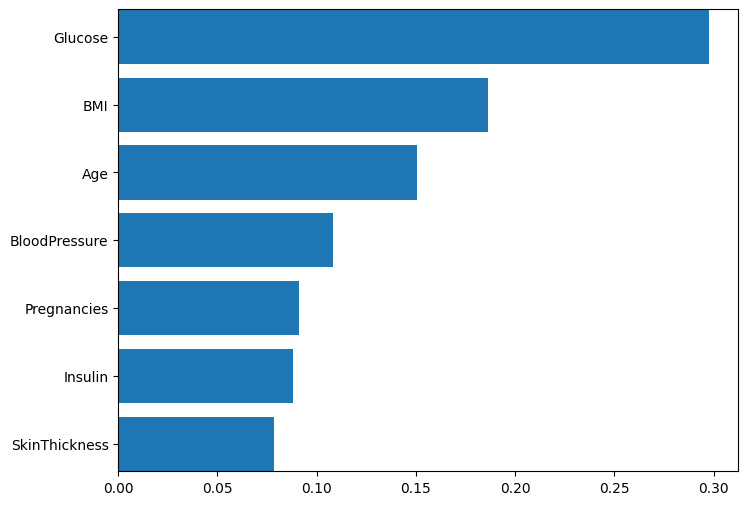

In [109]:
# Plot the feature importances
features = sorted(zip(X.columns, importances), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(8,6)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [111]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       129
           1       0.66      0.56      0.60        63

    accuracy                           0.76       192
   macro avg       0.73      0.71      0.72       192
weighted avg       0.75      0.76      0.75       192



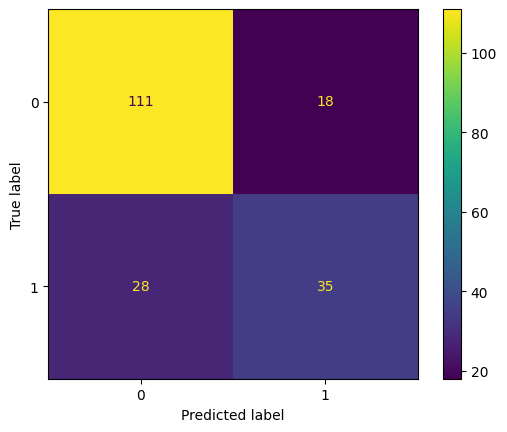

In [117]:
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
filename = 'rf.sav'
pickle.dump(rf_model, open(filename, 'wb'))

# Gradient Boost Classifier

In [118]:
gb_model = GradientBoostingClassifier(random_state=78)
gb_model = gb_model.fit(X_train, y_train)
print(f'Training Score: {gb_model.score(X_train, y_train)}')
print(f'Testing Score: {gb_model.score(X_test, y_test)}')
filename = 'gb.sav'
pickle.dump(gb_model, open(filename, 'wb'))

Training Score: 0.9288194444444444
Testing Score: 0.7552083333333334


In [119]:
predictions = gb_model.predict(X_test)

In [120]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       129
           1       0.66      0.52      0.58        63

    accuracy                           0.76       192
   macro avg       0.72      0.70      0.71       192
weighted avg       0.75      0.76      0.75       192



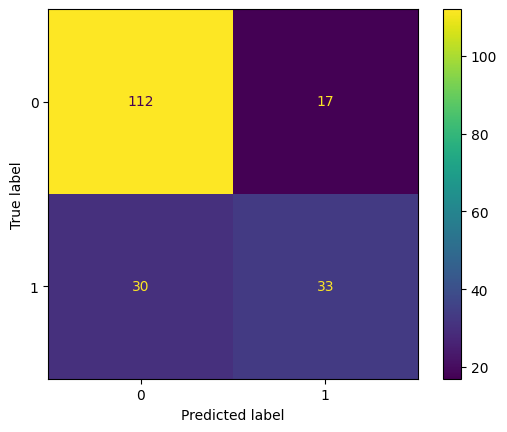

In [121]:
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Neural Network: PyTorch

In [124]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler

In [125]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the data to PyTorch tensors
X_train_scaled = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_scaled = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

# Define the neural network model
class DiabetesPTModel(nn.Module):
    def __init__(self):
        super(DiabetesPTModel, self).__init__()
        self.fc1 = nn.Linear(7, 16)
        self.fc2 = nn.Linear(16, 8)
        self.fc3 = nn.Linear(8, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

# Initialize the model, loss function, and optimizer
pt_model = DiabetesPTModel()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 100
for epoch in range(num_epochs):
    pt_model.train()
    optimizer.zero_grad()
    outputs = pt_model(X_train_scaled)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
pt_model.eval()
with torch.no_grad():
    predictions = pt_model(X_test_scaled)
    predictions = predictions.round()
    accuracy = (predictions.eq(y_test_tensor).sum() / float(y_test_tensor.shape[0])).item()
    print(f'Accuracy: {accuracy:.4f}')

# Save the model and scaler
torch.save(pt_model.state_dict(), 'diabetes_model_pt.pth')
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)


Epoch [10/100], Loss: 0.6763
Epoch [20/100], Loss: 0.6763
Epoch [30/100], Loss: 0.6763
Epoch [40/100], Loss: 0.6763
Epoch [50/100], Loss: 0.6763
Epoch [60/100], Loss: 0.6763
Epoch [70/100], Loss: 0.6763
Epoch [80/100], Loss: 0.6763
Epoch [90/100], Loss: 0.6763
Epoch [100/100], Loss: 0.6763
Accuracy: 0.6823


In [127]:
with torch.no_grad():
    predictions = model(X_test_scaled)
    predictions = predictions.round()

print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.79      0.88      0.83       129
           1       0.67      0.52      0.59        63

    accuracy                           0.76       192
   macro avg       0.73      0.70      0.71       192
weighted avg       0.75      0.76      0.75       192



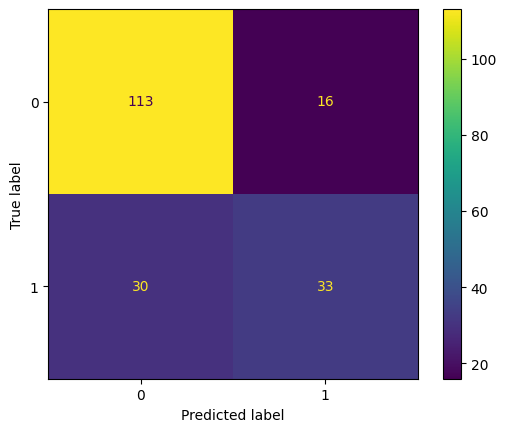

In [128]:
cm = confusion_matrix(y_test_tensor, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Neural Network: TensorFlow

In [ ]:
import tensorflow as tf

# Build the neural network model
tf_model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(7,)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
tf_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
# Using the same scaled data used with PyTorch model
tf_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Accuracy: {accuracy:.4f}')

# Save the model
tf_model.save('diabetes_model_tf.h5')



In [ ]:
 predictions = model.predict(x)